# Business Objectives :

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands

### Problem Description :
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. The 'cnt' variable indicates the total number of bike rentals, including both casual and registered.The model should be built taking this 'cnt' as the target variable.


## Solution : 

#### Importing Necessary Libraries

In [1]:
import pandas as pd # data processing, CSV file I/O.
import numpy as np # linear algebra

# For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For Warnings
import warnings

In [2]:
# Linear Regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### Setting configurations

In [3]:
pd.set_option('display.max_columns', None) # Display all  columns of dataframe
warnings.filterwarnings("ignore")          # Supress warnings

#### Reading Dataset

In [4]:
ride_data = pd.read_csv('E://UpgradDataFiles/day.csv')
ride_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Metadata of the Dataframe:

In [5]:
print("Shape of dataframe is "+str(ride_data.shape)+"\n")
print("Information about dataframe: ")
ride_data.info()

Shape of dataframe is (730, 16)

Information about dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [6]:
ride_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Data Understanding

In [7]:
ride_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


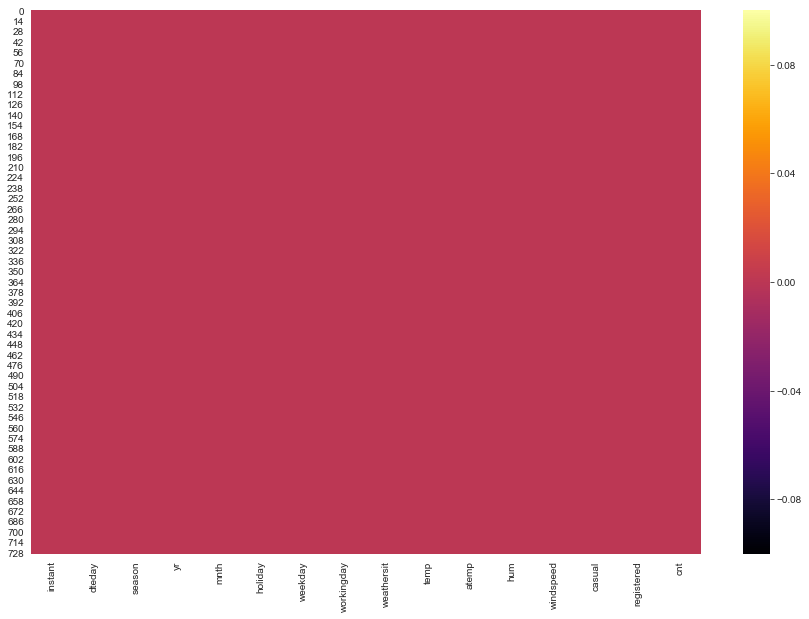

In [9]:
# ploting heat map to identify null in the columns if any

fig = plt.figure(figsize=(15,10))
sns.heatmap(ride_data.isna(),cmap='inferno')

None of the columns have null values

#### Scatter plot  for numerical columns
To understand even at all there is any linear relationship among the variable

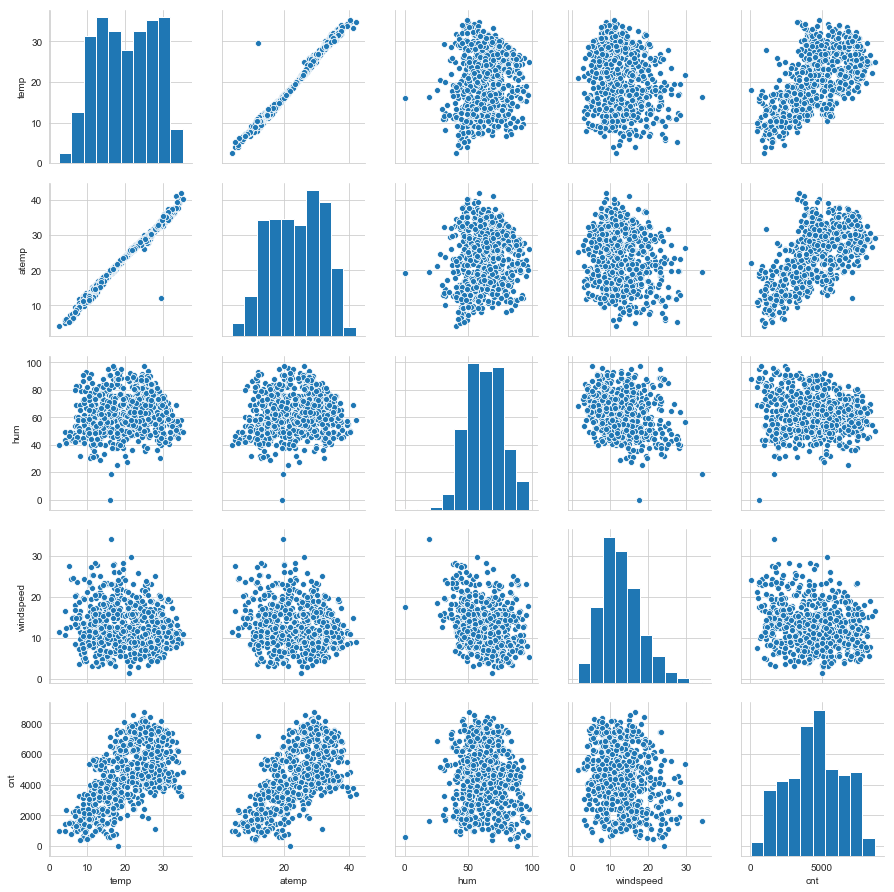

In [10]:
sns.pairplot(data=ride_data,vars=['temp', 'atemp', 'hum','windspeed','cnt'])
plt.show()

#### Box plot for categorical columns
To identify outliers in the data

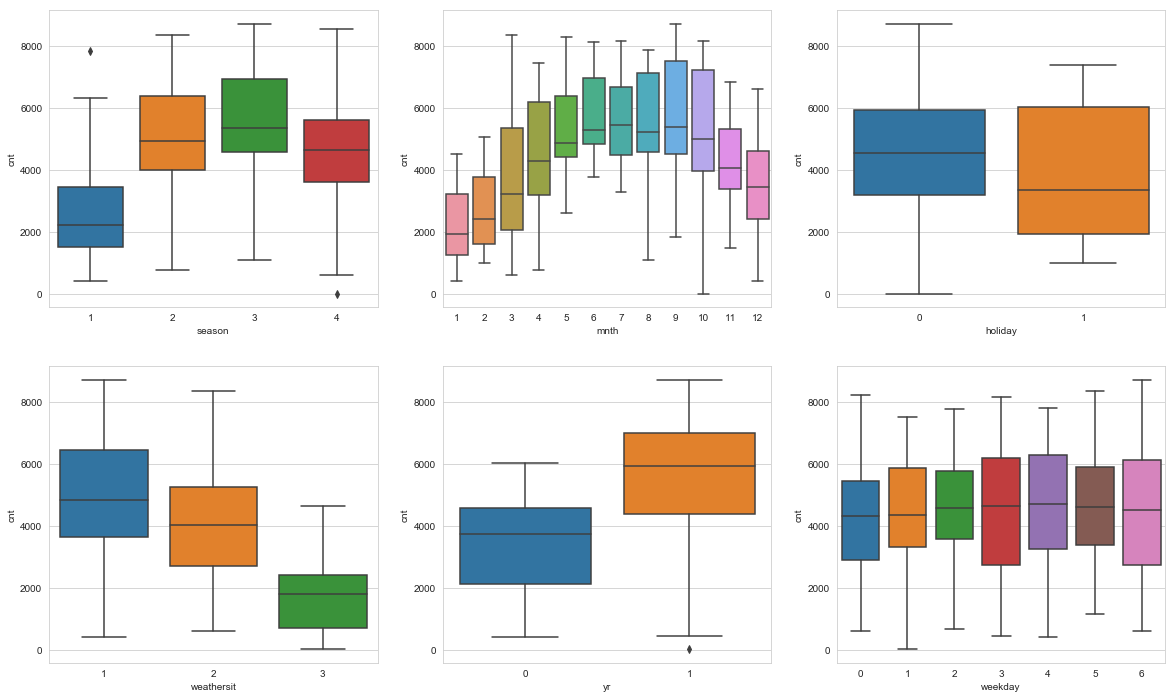

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = ride_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = ride_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = ride_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = ride_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = ride_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = ride_data)
plt.show()

### Observations of EDA

- The demand is least for spring and highest during fall
- The demand is high in 2019, as people got more acquaintant of the product
- There is no demand during 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' and demand is higher for clear weather
- The demand is less during holidays
- There is not much effect weekday on the demand

#### Heatmap for the data
To identify if there are any higly correlated columns

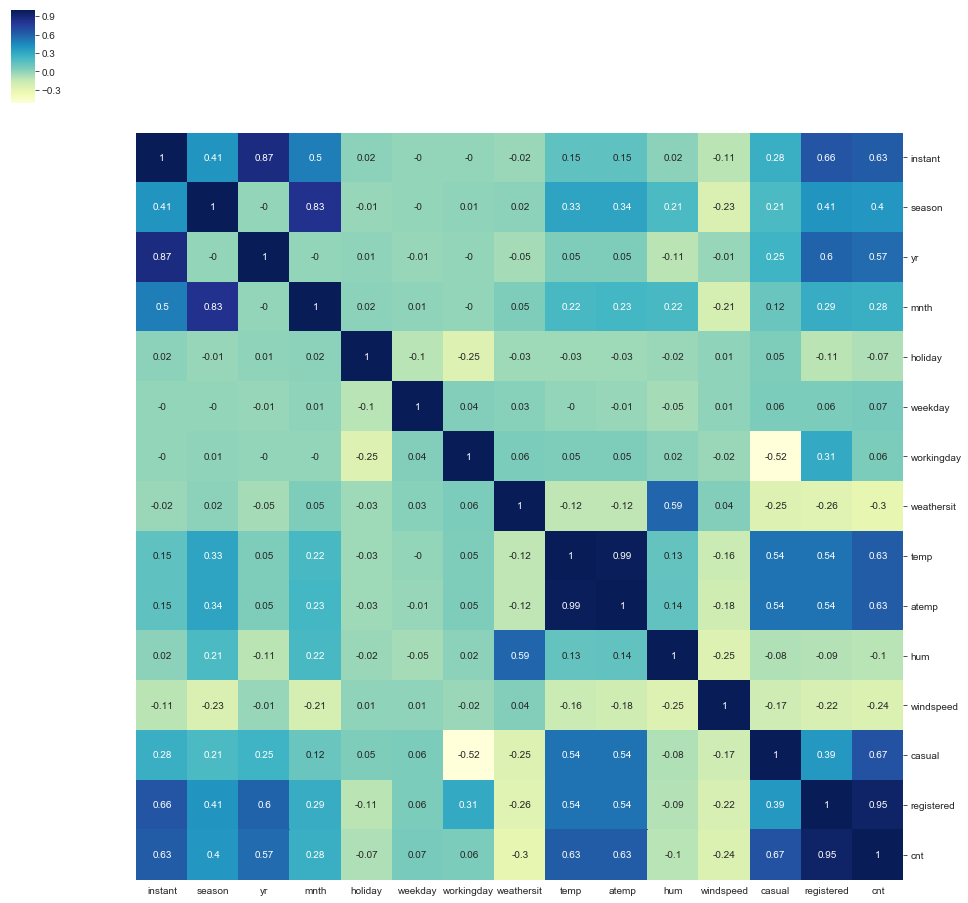

In [12]:
data_correlation = ride_data.corr().round(2)
sns.clustermap(data_correlation,annot=True,annot_kws={'size': 10}
               ,figsize=(16,16)
               ,col_cluster=False,row_cluster=False,cmap="YlGnBu")
plt.show()

#### There is high correlation between temp and atemp
#### There is high correlation between cnt,registered,casual

### Data Preparation

In [13]:
## dropping columns instant,dteday as they are irrelevant for the modelling
## dropping columns casual,registered as we are only interested in total counts , 
##                          and these columns directly signify multi colinearity with cnt
## dropping atemp as it is highly correlated to temp column

ride_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
ride_data.drop(['atemp'],axis = 1,inplace = True)
ride_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [14]:
## Translating numerical month values to month name(categorical values), 
## so the model does not take them for values rather than category

import calendar
ride_data['mnth'] =  ride_data['mnth'].apply(lambda x: calendar.month_abbr[x])
ride_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,Jan,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,Jan,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,Jan,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,Jan,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,Jan,0,3,1,1,9.305237,43.6957,12.522300,1600


In [15]:
## Translating numerical season values to season name(categorical values) as per the data dictionary ,
## so the model does not take them for values rather than category 

ride_data.season = ride_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
ride_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,2,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,2,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,1,9.305237,43.6957,12.522300,1600


In [16]:
## Translating numerical weathersit values to weathersit name(categorical values) as per the data dictionary ,
## so the model does not take them for values rather than category 

ride_data.weathersit = ride_data.weathersit.map({
    1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
    3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
ride_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600


In [17]:
## Translating numerical weekdays values to weekday name(categorical values), 
## so the model does not take them for values rather than category

ride_data.weekday = ride_data.weekday.map(
    {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
ride_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600


#### Creating dummy variables 
For the categorical columns :season , mnth ,weathersit ,weekday and dropping the first column for the dummy columns as it reduces the correlations created among the dummy variables as the same amount of information can be conveyed with one-less dummy variable.

In [18]:
## Creating dummy variables and dropping first variable

dummy = ride_data[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )

## Joining the dummy variables with the rider_data

ride_data = pd.concat([dummy,ride_data],axis = 1)

In [19]:
## dropping columns for which dummy variables were created

ride_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [20]:
## Data after creation of dummy varaibles
ride_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


#### Split into Train and Test DataSet and Rescaling

In [21]:
# Using sklearn library splitting the data into train and test data in 70:30 ratio

np.random.seed(0)
day_train, day_test = train_test_split(ride_data,train_size=0.7,random_state=100)

In [22]:
# Shape of the Train and Test dataset 
print("Shape of train dataframe is "+str(day_train.shape)+"\n")
print("Shape of test dataframe is "+str(day_test.shape)+"\n")

Shape of train dataframe is (510, 29)

Shape of test dataframe is (220, 29)



#### Rescaling 
Rescalling the numerical columns using MinMaxScaler

In [23]:
scaler = MinMaxScaler()

# Apply scaler() to all the  numeric columns except the 'dummy' variables for train dataset.

num_vars = ['cnt','hum','windspeed','temp']
day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

In [24]:
## The train dataset after MinMax Scaling

day_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Selecting independent and dependent  variables

In [25]:
y_train =  day_train.pop("cnt").astype(float)
X_train = day_train.astype(float)

In [26]:
X_train.shape

(510, 28)

### Using RFE to select top features
As the number of independent variables are high in the X_train, using Recursive Feature Elimination (RFE) for the selecting top 15 features.

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
#Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 6),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  True,
  1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [30]:
## Columns selected by RFE. Will start with these columns for manual elimination

RFE_cols = X_train.columns[rfe.support_]
RFE_cols

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [31]:
## Columns not selected by RFE. 
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [32]:
X_train_rfe = X_train[RFE_cols]

Fitting a regression plane through the training data using statsmodels. In statsmodels, you need to explicitly add a constant using sm.add_constant(X) else, statsmodels fits a regression plane passing through the origin, by default.

### Model 1
Building model using the features selected by RFE (top 15)

In [33]:
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm)    # Ordinary Least-Squares
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.22e-191
Time:                        18:41:08   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2519      0.036      6.969      0.000       0.181       0.323
season_Spring                                                                                         -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer                                                                                          0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter                                                                                          0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                                                                                              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                                                                                              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                                                                                               0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Saturday                                                                                       0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0563      0.010     -5.439      0.000      -0.077      -0.036
yr                                                                                                     0.2305      0.008     28.795      0.000       0.215       0.246
holiday                                                                                               -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                                                                                             0.0433      0.012      3.762      0.000       0.021       0.066
temp                                                                                                   0.5096      0.034     14.837      0.000       0.442       0.577
hum                                                                                                   -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                                                                    

In [34]:
# Calculating the VIF of all the columns to understand co-linearity between the variables

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
13,hum,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.46
1,season_Summer,2.85
8,"weathersit_Mist + Cloudy, Mist + Broken clouds...",2.29
9,yr,2.09
6,weekday_Saturday,1.98


### Model 2
Dropping 'hum' as the p-value of all the feature is < 0.05, and VIF of 'hum' > 10

In [35]:
X_train_rfe=X_train_rfe.drop('hum',axis = 1)

In [36]:
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm)
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.60e-188
Time:                        18:41:34   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.1737      0.031      5.520      0.000       0.112       0.235
season_Spring                                                                                         -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_Summer                                                                                          0.0445      0.015      2.967      0.003       0.015       0.074
season_Winter                                                                                          0.0784      0.017      4.562      0.000       0.045       0.112
mnth_Jan                                                                                              -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_Jul                                                                                              -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sep                                                                                               0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Saturday                                                                                       0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0813      0.009     -9.437      0.000      -0.098      -0.064
yr                                                                                                     0.2345      0.008     29.009      0.000       0.219       0.250
holiday                                                                                               -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                                                                                             0.0464      0.012      3.966      0.000       0.023       0.069
temp                                                                                                   0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                                                                                             -0.1563      0.025     -6.286      0.000      -0.205      -0.107
=============================================================================

In [37]:
# Calculating the VIF of all the columns to understant co-linearity between the variables

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.68
0,season_Spring,3.07
1,season_Summer,2.34
9,yr,2.08
2,season_Winter,1.98
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


### Model 3
As the VIF is high for both 'temp' and 'workingday' , making subjective call to drop 'workingday' here as 'temp' seems to be important feature at this time.
Dropping 'workingday' as the p-value of all the feature is < 0.05, and VIF of 'hum' > 5

In [38]:
X_train_rfe=X_train_rfe.drop('workingday',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.48e-186
Time:                        18:42:05   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2120      0.030      6.978      0.000       0.152       0.272
season_Spring                                                                                         -0.0615      0.021     -2.902      0.004      -0.103      -0.020
season_Summer                                                                                          0.0437      0.015      2.871      0.004       0.014       0.074
season_Winter                                                                                          0.0755      0.017      4.334      0.000       0.041       0.110
mnth_Jan                                                                                              -0.0386      0.018     -2.159      0.031      -0.074      -0.003
mnth_Jul                                                                                              -0.0508      0.019     -2.735      0.006      -0.087      -0.014
mnth_Sep                                                                                               0.0762      0.017      4.504      0.000       0.043       0.109
weekday_Saturday                                                                                       0.0201      0.011      1.787      0.075      -0.002       0.042
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2859      0.025    -11.619      0.000      -0.334      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0794      0.009     -9.097      0.000      -0.097      -0.062
yr                                                                                                     0.2347      0.008     28.620      0.000       0.219       0.251
holiday                                                                                               -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp                                                                                                   0.4734      0.034     13.837      0.000       0.406       0.541
windspeed                                                                                             -0.1570      0.025     -6.226      0.000      -0.207      -0.107
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:  

In [40]:
# Calculating the VIF of all the columns to understand co-linearity between the variables

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,temp,5.16
12,windspeed,4.64
0,season_Spring,2.76
1,season_Summer,2.24
9,yr,2.07
2,season_Winter,1.80
3,mnth_Jan,1.61
4,mnth_Jul,1.59
8,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.56
5,mnth_Sep,1.34


### Model 4
Droppping 'weekday_Saturday'(p-value = 0.075) as the  p-value > 0.05

In [41]:
X_train_rfe=X_train_rfe.drop('weekday_Saturday',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.14e-187
Time:                        18:42:28   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2154      0.030      7.088      0.000       0.156       0.275
season_Spring                                                                                         -0.0617      0.021     -2.905      0.004      -0.103      -0.020
season_Summer                                                                                          0.0434      0.015      2.845      0.005       0.013       0.073
season_Winter                                                                                          0.0757      0.017      4.335      0.000       0.041       0.110
mnth_Jan                                                                                              -0.0383      0.018     -2.138      0.033      -0.073      -0.003
mnth_Jul                                                                                              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
mnth_Sep                                                                                               0.0764      0.017      4.506      0.000       0.043       0.110
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0793      0.009     -9.067      0.000      -0.096      -0.062
yr                                                                                                     0.2343      0.008     28.517      0.000       0.218       0.250
holiday                                                                                               -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                                                                                                   0.4721      0.034     13.772      0.000       0.405       0.539
windspeed                                                                                             -0.1549      0.025     -6.135      0.000      -0.205      -0.105
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
================

In [42]:
# Calculating the VIF of all the columns to understand co-linearity between the variables

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.62
0,season_Spring,2.75
1,season_Summer,2.24
8,yr,2.07
2,season_Winter,1.78
3,mnth_Jan,1.61
4,mnth_Jul,1.59
7,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.56
5,mnth_Sep,1.34


### Model 5
Dropping 'temp' as the p-value of all the feature is < 0.05, and VIF of 'temp' > 5

In [43]:
X_train_rfe=X_train_rfe.drop('temp',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.36e-153
Time:                        18:42:52   Log-Likelihood:                 418.70
No. Observations:                 510   AIC:                            -813.4
Df Residuals:                     498   BIC:                            -762.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.5869      0.016     35.702      0.000       0.555       0.619
season_Spring                                                                                         -0.2621      0.018    -14.430      0.000      -0.298      -0.226
season_Summer                                                                                         -0.0438      0.016     -2.690      0.007      -0.076      -0.012
season_Winter                                                                                         -0.0791      0.016     -5.042      0.000      -0.110      -0.048
mnth_Jan                                                                                              -0.1017      0.020     -5.010      0.000      -0.142      -0.062
mnth_Jul                                                                                              -0.0122      0.022     -0.563      0.574      -0.055       0.030
mnth_Sep                                                                                               0.0719      0.020      3.615      0.000       0.033       0.111
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2980      0.029    -10.297      0.000      -0.355      -0.241
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0861      0.010     -8.404      0.000      -0.106      -0.066
yr                                                                                                     0.2477      0.010     25.857      0.000       0.229       0.267
holiday                                                                                               -0.0983      0.031     -3.220      0.001      -0.158      -0.038
windspeed                                                                                             -0.1868      0.030     -6.328      0.000      -0.245      -0.129
==============================================================================
Omnibus:                       31.827   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.055
Skew:                          -0.394   Prob(JB):                     9.10e-14
Kurtosis:                       4.485   Cond. No.                         9.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"

In [44]:
# Calculating the VIF of all the columns to understant co-linearity between the variables

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,windspeed,3.85
0,season_Spring,2.75
1,season_Summer,2.02
8,yr,1.83
2,season_Winter,1.73
3,mnth_Jan,1.60
7,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.52
4,mnth_Jul,1.19
5,mnth_Sep,1.16
6,"weathersit_Light Snow, Light Rain + Thundersto...",1.08


### NOTE: 
Droppping 'temp' had significant drop in r-square and r-square adjusted, thus 'temp' is an important feature .
Will try adding 'temp' feature back after dropping other features

### Model 6
Droppping 'mnth_Jul'(p-value = 0.574) as the  p-value > 0.05

In [45]:
X_train_rfe=X_train_rfe.drop('mnth_Jul',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.93e-154
Time:                        18:43:10   Log-Likelihood:                 418.53
No. Observations:                 510   AIC:                            -815.1
Df Residuals:                     499   BIC:                            -768.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.5824      0.014     40.624      0.000       0.554       0.611
season_Spring                                                                                         -0.2578      0.016    -15.675      0.000      -0.290      -0.225
season_Summer                                                                                         -0.0395      0.014     -2.750      0.006      -0.068      -0.011
season_Winter                                                                                         -0.0750      0.014     -5.394      0.000      -0.102      -0.048
mnth_Jan                                                                                              -0.1018      0.020     -5.016      0.000      -0.142      -0.062
mnth_Sep                                                                                               0.0753      0.019      3.976      0.000       0.038       0.113
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2981      0.029    -10.309      0.000      -0.355      -0.241
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0857      0.010     -8.390      0.000      -0.106      -0.066
yr                                                                                                     0.2477      0.010     25.881      0.000       0.229       0.267
holiday                                                                                               -0.0980      0.030     -3.213      0.001      -0.158      -0.038
windspeed                                                                                             -0.1867      0.030     -6.329      0.000      -0.245      -0.129
==============================================================================
Omnibus:                       31.973   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.054
Skew:                          -0.397   Prob(JB):                     9.11e-14
Kurtosis:                       4.482   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Calculating the VIF of all the columns to understand co-linearity between the variables

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,windspeed,3.50
0,season_Spring,2.58
1,season_Summer,1.86
7,yr,1.77
2,season_Winter,1.63
3,mnth_Jan,1.59
6,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.52
4,mnth_Sep,1.14
5,"weathersit_Light Snow, Light Rain + Thundersto...",1.08
8,holiday,1.04


### Model 7
Adding 'temp' back as there was significant drop in r-square, r-square after dropping 'temp' and analyzing if we still see high VIF or insignificant p-values

In [47]:
temp = X_train['temp']
X_train_rfe= pd.concat([X_train_rfe,temp],axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.96e-186
Time:                        18:43:43   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2080      0.030      6.829      0.000       0.148       0.268
season_Spring                                                                                         -0.0500      0.021     -2.391      0.017      -0.091      -0.009
season_Summer                                                                                          0.0583      0.014      4.070      0.000       0.030       0.086
season_Winter                                                                                          0.0876      0.017      5.157      0.000       0.054       0.121
mnth_Jan                                                                                              -0.0403      0.018     -2.242      0.025      -0.076      -0.005
mnth_Sep                                                                                               0.0900      0.016      5.527      0.000       0.058       0.122
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2863      0.025    -11.538      0.000      -0.335      -0.238
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0779      0.009     -8.864      0.000      -0.095      -0.061
yr                                                                                                     0.2349      0.008     28.418      0.000       0.219       0.251
holiday                                                                                               -0.0956      0.026     -3.656      0.000      -0.147      -0.044
windspeed                                                                                             -0.1555      0.025     -6.119      0.000      -0.205      -0.106
temp                                                                                                   0.4583      0.034     13.435      0.000       0.391       0.525
==============================================================================
Omnibus:                       64.010   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.103
Skew:                          -0.682   Prob(JB):                     8.43e-32
Kurtosis:                       5.208   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"

In [48]:
# Calculating the VIF of all the columns to understand co-linearity between the variables

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,windspeed,4.61
10,temp,3.85
0,season_Spring,2.63
7,yr,2.07
1,season_Summer,1.91
2,season_Winter,1.63
3,mnth_Jan,1.60
6,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.56
4,mnth_Sep,1.23
5,"weathersit_Light Snow, Light Rain + Thundersto...",1.08


#### Model Selection
##### This model is selected ,with temp included .In this model there is no features having p-value >= 0.05 or VIF > 5. And the model has pretty good R-squared and Adj. R-squared and they are close in values.

In [49]:
### Parameters of the models
lr_model.params

const                                                                                                 0.207978
season_Spring                                                                                        -0.050043
season_Summer                                                                                         0.058266
season_Winter                                                                                         0.087618
mnth_Jan                                                                                             -0.040339
mnth_Sep                                                                                              0.090036
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   -0.286295
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                              -0.077852
yr                                                                                                    0.234864
h

### Residual Analysis of the train data

Text(0.5,0,'res')

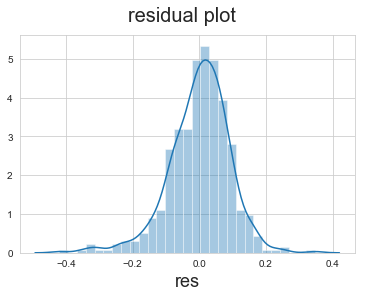

In [50]:
# Plot the histogram of the error terms , to check if the error terms are normally distributed and have mean of 0 

y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res)
fig.suptitle('residual plot', fontsize = 20)              # Plot heading 
plt.xlabel('res', fontsize = 18)              # X-label

Text(0,0.5,'res')

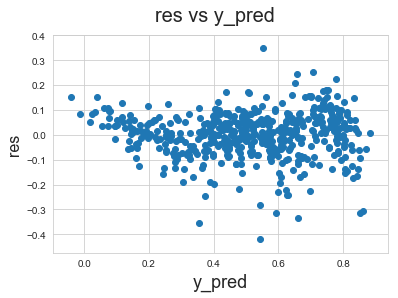

In [51]:
# Residual vs Fitted values Scatter plot can be used to validate linear relationship in data.

fig = plt.figure()
plt.scatter(y_train_pred, res)
fig.suptitle('res vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_pred', fontsize = 18)              # X-label
plt.ylabel('res', fontsize = 16)     

Text(0,0.5,'y_pred')

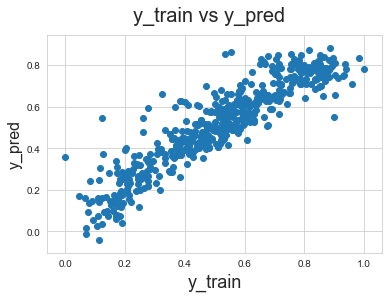

In [52]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)              # X-label
plt.ylabel('y_pred', fontsize = 16)     

### Predictions Using the Selected Model

#### Applying the scaling on the test sets
Scale the test dataset using the same scaler as that of the train dataset

In [53]:
num_vars = ['cnt','hum','windspeed','temp']
day_test[num_vars] = scaler.transform(day_test[num_vars])

day_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


#### Selecting independent and dependent  variables

In [54]:
y_test =  day_test.pop("cnt").astype(float)

# Columns selected in the model
final_columns = X_train_rfe.columns
X_test = day_test[final_columns].astype(float)

In [55]:
# Adding constant variable to independent test dataframe
X_test = sm.add_constant(X_test)

In [56]:
X_test.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Sep,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",yr,holiday,windspeed,temp
184,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.084219,0.831783
535,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.153728,0.901354
299,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.334206,0.511964
221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.339570,0.881625
152,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537414,0.817246


In [57]:
# Making predictions using the final model

y_pred = lr_model.predict(X_test)

### Model Evaluation

#### R2_Score (coefficient of determination) 
R2 score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model

In [58]:
# Calculating the r2_score for true values and predicted values on train dataset
r2_score(y_test, y_pred)

0.8008869691998373

#### Mean squared error
Measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value

In [59]:
# Calculating mean_squared_error for true values and predicted values on train dataset
mse = mean_squared_error(y_test, y_pred)
mse

0.009520446108257394

## Final Equation



#### cnt =   0.207978  -  0.050043*season_Spring  +  0.058266*season_Summer + 0.087618*season_Winter - 0.040339*mnth_Jan  +  0.090036*mnth_Sep - 0.286295*(weathersit_Light Snow,Light Rain+Thunderstorm+Scattered clouds,Light Rain+Scattered clouds)- 0.077852*(weathersit_Mist+Cloudy,Mist+Broken clouds,Mist+Few clouds,Mist) +  0.234864*yr  - 0.095612*holiday -0.155470*windspeed + 0.458296*temp
                                                                                          

- Moderate the temp results in higher demand
- Light snow, Mist cloudy have negative coefficient,with increase is these factors demands decrease.
- Bike rentals is high during the month of September and low during month of January 
- The rentals reduce during holidays
- Demands decreases on a windy day
- Demands increase with yr as more people become acquaintance
- Demands increases during Summer and Winter and decreases during Spring


#### The bike rentals is majorly affected by temperature,season and weather.